In [1]:
from msdm.domains import GridWorld

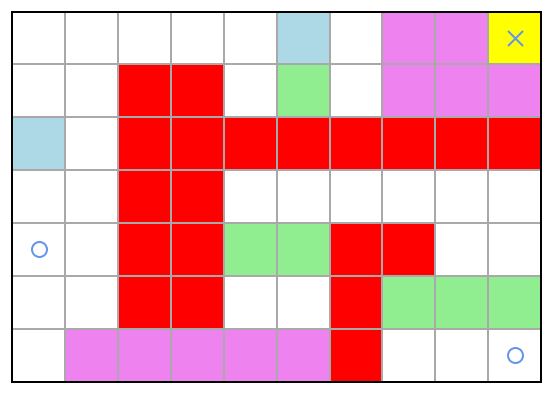

In [17]:
gw = GridWorld(
    tile_array=[
        ".....c.bbg",
        "..xx.a.bbb",
        "c.xxxxxxxx",
        "..xx......",
        "s.xxaaxx..",
        "..xx..xaaa",
        ".bbbbbx..s",
    ],
    feature_rewards={
        'g': 10,
        'x': -500,
        '.': 0,
        'a': 0,
        'b': 0,
        'c': -5
    },
    absorbing_features=('g'),
    initial_features=('s'),
)
featurecolors={
    'g': 'yellow',
    'x': 'red',
    '.': 'white',
    'a': 'lightgreen',
    'b': 'violet',
    'c': 'lightblue'
}
gw.plot(featurecolors=featurecolors)

In [18]:
from msdm.algorithms import ValueIteration
vi_res = ValueIteration().plan_on(gw)

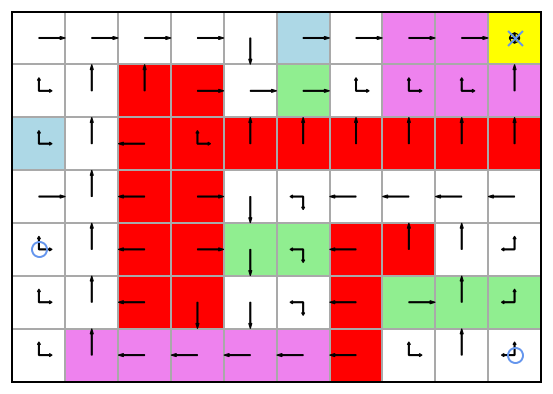

In [19]:
gw.plot(featurecolors=featurecolors).plot_policy(vi_res.policy)

# State feature visitation
Set of states $s \in S$, a featurization of $s$:
$$
\phi : S \rightarrow \mathbb{R}^k
$$

In [24]:
from collections import defaultdict
def traj_feature_counts(state_traj, gw):
    counts = defaultdict(int)
    for s in state_traj:
        f = gw.location_features.get(s, '.')
        counts[f] += 1
    return counts

defaultdict(<class 'int'>, {'s': 1, 'a': 3, '.': 19, 'b': 7, 'g': 1})


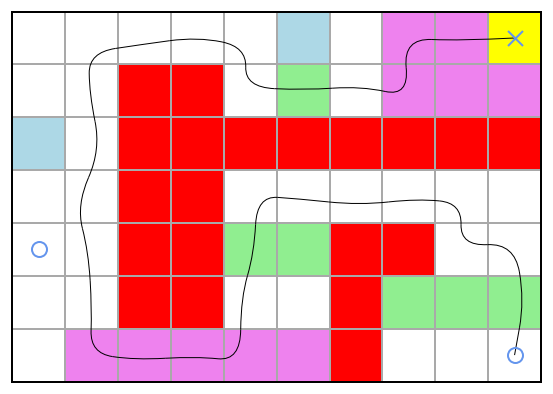

In [26]:
gwp = gw.plot(featurecolors=featurecolors)
total_fcounts = defaultdict(int)
for _ in range(1):
    traj = vi_res.policy.run_on(gw)
    gwp.plot_trajectory(traj.state_traj)
    fcounts = traj_feature_counts(traj.state_traj, gw)
    for f, c in fcounts.items():
        total_fcounts[f] += c
print(total_fcounts)